In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


Note!! In the data below, it seems that the direction of hidden liquidity execution is always 1 -  we will not be able to know the direction

In [3]:
SPY_m2 = pd.read_csv("./data/SPY/SPY_2019-01-02_24900000_57900000_message_10.csv", header=None)
SPY_m3 = pd.read_csv("./data/SPY/SPY_2019-01-03_24900000_57900000_message_10.csv", header=None)
SPY_m4 = pd.read_csv("./data/SPY/SPY_2019-01-04_24900000_57900000_message_10.csv", header=None)

SPY_ob2 = pd.read_csv("./data/SPY/SPY_2019-01-02_24900000_57900000_orderbook_10.csv", header=None)
SPY_ob3 = pd.read_csv("./data/SPY/SPY_2019-01-03_24900000_57900000_orderbook_10.csv", header=None)
SPY_ob4 = pd.read_csv("./data/SPY/SPY_2019-01-04_24900000_57900000_orderbook_10.csv", header=None)

In [4]:
SPY_m2 = SPY_m2.iloc[:,:-1]
SPY_m3 = SPY_m3.iloc[:,:-1]
SPY_m4 = SPY_m4.iloc[:,:-1]

In [5]:
M_header = ['time', 'event_type', 'order_ID',
            'size', 'price', 'direction']

SPY_m2.columns = M_header
SPY_m3.columns = M_header
SPY_m4.columns = M_header


OB_header = []
for i in range(1, SPY_ob2.shape[1]//4 + 1):
    OB_header.append(f'ask_price_{i}')
    OB_header.append(f'ask_size_{i}')
    OB_header.append(f'bid_price_{i}')
    OB_header.append(f'bid_size_{i}')

SPY_ob2.columns = OB_header
SPY_ob3.columns = OB_header
SPY_ob4.columns = OB_header

In [6]:
SPY_m2['time'] = pd.to_timedelta(SPY_m2['time'], unit='s')
SPY_m3['time'] = pd.to_timedelta(SPY_m3['time'], unit='s')
SPY_m4['time'] = pd.to_timedelta(SPY_m4['time'], unit='s')

# Define the base date
base_date2 = pd.Timestamp('2019-01-02')
base_date3 = pd.Timestamp('2019-01-03')
base_date4 = pd.Timestamp('2019-01-04')

# Add the timedelta (time_sec) to the base date
SPY_m2['datetime'] = base_date2 + SPY_m2['time']
SPY_m3['datetime'] = base_date3 + SPY_m3['time']
SPY_m4['datetime'] = base_date4 + SPY_m4['time']

SPY_m2.drop(columns=['time'], inplace=True)
SPY_m3.drop(columns=['time'], inplace=True)
SPY_m4.drop(columns=['time'], inplace=True)

In [7]:
SPY_m = pd.concat([SPY_m2, SPY_m3, SPY_m4], ignore_index=True)
SPY_ob = pd.concat([SPY_ob2, SPY_ob3, SPY_ob4], ignore_index=True)

In [8]:
# Creating event number
SPY_m['event_number'] = SPY_m.groupby('datetime').cumcount()
SPY_m['event_number_at_t'] = SPY_m.groupby('datetime')['event_type'].transform('count')

# Setting the composite index
SPY_m.set_index(['datetime', 'event_number'], inplace=True)

In [9]:
SPY_m[(SPY_m['event_type']==5)]

event_type  order_ID  size  \
datetime                      event_number                               
2019-01-02 04:02:11.334853879 0                      5         0    50   
2019-01-02 04:06:16.487687382 1                      5         0   400   
2019-01-02 04:10:14.926255603 0                      5         0   200   
2019-01-02 04:15:30.336646068 0                      5         0   200   
                              2                      5         0   100   
...                                                ...       ...   ...   
2019-01-04 18:06:39.754760452 0                      5         0   500   
2019-01-04 18:11:43.184629519 0                      5         0    10   
2019-01-04 18:25:06.430868019 0                      5         0     4   
2019-01-04 19:19:59.300414876 1                      5         0   298   
2019-01-04 19:50:07.509258550 0                      5         0    99   

                                              price  direction  \
datetime                      event_number                       
2019-01-02 04:02:11.334853879 0             2450800          1   
2019-01-02 04:06:16.487687382 1             2452400          1   
2019-01-02 04:10:14.926255603 0             2454600          1   
2019-01-02 04:15:30.336646068 0             2455400          1   
                              2             2455500          1   
...                                             ...        ...   
2019-01-04 18:06:39.754760452 0             2530200          1   
2019-01-04 18:11:43.184629519 0             2525000          1   
2019-01-04 18:25:06.430868019 0             2524500          1   
2019-01-04 19:19:59.300414876 1             2526500          1   
2019-01-04 19:50:07.509258550 0             2527400          1   

                                            event_number_at_t  
datetime                      event_number                     
2019-01-02 04:02:11.334853879 0                             2  
2019-01-02 04:06:16.487687382 1                             2  
2019-01-02 04:10:14.926255603 0                             1  
2019-01-02 04:15:30.336646068 0                             3  
                              2                             3  
...                                                       ...  
2019-01-04 18:06:39.754760452 0                             1  
2019-01-04 18:11:43.184629519 0                             1  
2019-01-04 18:25:06.430868019 0                             2  
2019-01-04 19:19:59.300414876 1                             2  
2019-01-04 19:50:07.509258550 0                             2  

[34621 rows x 6 columns]

In [10]:
SPY_m[(SPY_m['event_type']==5)&(SPY_m['event_number_at_t']==1)]

,,event_type,order_ID,size,price,direction,event_number_at_t
datetime,event_number,,,,,,
2019-01-02 04:10:14.926255603,0,5,0,200,2454600,1,1
2019-01-02 06:07:04.489945440,0,5,0,100,2461900,1,1
2019-01-02 07:04:12.197767760,0,5,0,200,2464200,1,1
2019-01-02 07:04:12.198466664,0,5,0,400,2464200,1,1
2019-01-02 07:09:19.108650684,0,5,0,20,2465200,1,1
...,...,...,...,...,...,...,...
2019-01-04 16:42:15.843940438,0,5,0,250,2522900,1,1
2019-01-04 17:13:09.759896173,0,5,0,14,2522900,1,1
2019-01-04 18:06:39.642728492,0,5,0,500,2530200,1,1


In [11]:
SPY_ob.index = SPY_m.index

In [12]:
SPY_ob_L1 = SPY_ob.iloc[:, :4]

In [13]:
SPY_ob_L1['ask_price_1_prev'] = SPY_ob_L1['ask_price_1'].shift()
SPY_ob_L1['ask_size_1_prev'] = SPY_ob_L1['ask_size_1'].shift()
SPY_ob_L1['bid_price_1_prev'] = SPY_ob_L1['bid_price_1'].shift()
SPY_ob_L1['bid_size_1_prev'] = SPY_ob_L1['bid_size_1'].shift()

In [14]:
# Define the start and end times
start_time = pd.to_datetime("09:15:00").time()
end_time = pd.to_datetime("15:45:00").time()

# Extract the 'datetime' level from the MultiIndex and filter based on the time
filtered_index = SPY_m.index.get_level_values('datetime').to_series().between_time(start_time, end_time).index

# Use the filtered index to get the filtered DataFrame
SPY_m_mh = SPY_m.loc[filtered_index]
SPY_ob_L1_mh = SPY_ob_L1.loc[filtered_index]

In [15]:
SPY_m_mh = SPY_m_mh[~SPY_m_mh.index.duplicated(keep='first')]
SPY_ob_L1_mh = SPY_ob_L1_mh[~SPY_ob_L1_mh.index.duplicated(keep='first')]


In [16]:
SPY_m_hid_mh = SPY_m_mh[SPY_m_mh['event_type']==5]
SPY_m_hid_mh = SPY_m_hid_mh.merge(SPY_ob_L1_mh, left_index=True, right_index=True, how='inner')

In [17]:
SPY_m_hid_mh

,,event_type,order_ID,size,price,direction,event_number_at_t,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_1_prev,ask_size_1_prev,bid_price_1_prev,bid_size_1_prev
datetime,event_number,,,,,,,,,,,,,,
2019-01-02 09:16:16.397038098,1,5,0,1920,2460000,1,2,2460700,1000,2459800,500,2460700.0,1000.0,2459800.0,500.0
2019-01-02 09:16:17.965022559,1,5,0,1390,2460000,1,2,2460600,500,2459900,500,2460600.0,500.0,2459900.0,500.0
2019-01-02 09:16:18.043839166,1,5,0,1570,2460000,1,2,2460600,500,2459900,500,2460600.0,500.0,2459900.0,500.0
2019-01-02 09:16:18.612182747,1,5,0,920,2460000,1,2,2460600,500,2459900,500,2460600.0,500.0,2459900.0,500.0
2019-01-02 09:16:19.005930542,1,5,0,1000,2460000,1,2,2460600,500,2459900,500,2460600.0,500.0,2459900.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-04 15:44:48.813004101,0,5,0,100,2521450,1,6,2521500,200,2521400,800,2521500.0,200.0,2521400.0,800.0
2019-01-04 15:44:53.414984322,1,5,0,10,2521000,1,2,2521100,900,2520900,300,2521100.0,900.0,2520900.0,300.0
2019-01-04 15:44:54.018610446,1,5,0,200,2521050,1,2,2521200,600,2521000,900,2521200.0,600.0,2521000.0,900.0


In [18]:
SPY_m_hid_mh['midprice'] = (SPY_m_hid_mh['ask_price_1'] + SPY_m_hid_mh['bid_price_1']) / 2

Indicator for whether hidden liquidity is at the best bid or ask

In [19]:
SPY_m_hid_mh['hid_at_best'] = (SPY_m_hid_mh['price'] == SPY_m_hid_mh['bid_price_1']) + (SPY_m_hid_mh['price'] == SPY_m_hid_mh['ask_price_1'])

In [20]:
SPY_m_hid_mh[SPY_m_hid_mh['hid_at_best'] & (SPY_m_hid_mh['event_number_at_t']==1)]

,,event_type,order_ID,size,price,direction,event_number_at_t,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_1_prev,ask_size_1_prev,bid_price_1_prev,bid_size_1_prev,midprice,hid_at_best
datetime,event_number,,,,,,,,,,,,,,,,
2019-01-02 09:16:26.669189678,0,5,0,100,2460000,1,1,2460100,200,2460000,500,2460100.0,200.0,2460000.0,500.0,2460050.0,True
2019-01-02 09:23:22.188642019,0,5,0,125,2459500,1,1,2459500,500,2459000,500,2459500.0,500.0,2459000.0,500.0,2459250.0,True
2019-01-02 09:30:10.152135065,0,5,0,100,2460800,1,1,2461000,239,2460800,30,2461000.0,239.0,2460800.0,30.0,2460900.0,True
2019-01-02 09:30:10.206596042,0,5,0,500,2460800,1,1,2461000,239,2460800,500,2461000.0,239.0,2460800.0,500.0,2460900.0,True
2019-01-02 09:30:11.804822308,0,5,0,100,2460600,1,1,2460800,500,2460600,600,2460800.0,500.0,2460600.0,600.0,2460700.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-04 15:40:48.129833267,0,5,0,100,2518900,1,1,2518900,700,2518800,300,2518900.0,700.0,2518800.0,300.0,2518850.0,True
2019-01-04 15:41:37.022387994,0,5,0,100,2519100,1,1,2519200,5200,2519100,500,2519200.0,5200.0,2519100.0,500.0,2519150.0,True
2019-01-04 15:43:28.669558130,0,5,0,300,2520900,1,1,2520900,200,2520800,600,2520900.0,200.0,2520800.0,600.0,2520850.0,True


How to query particular timestamp.

In [21]:
specific_timestamp = pd.Timestamp('2019-01-02 09:23:22.188642019')
SPY_m.index.get_loc((specific_timestamp, 0))
# SPY_m[SPY_m.index.get_level_values('datetime') == specific_timestamp]

85640

In [22]:
SPY_m.iloc[85638:85643]

event_type  order_ID  size  \
datetime                      event_number                               
2019-01-02 09:23:22.188636432 0                      1  10384564   100   
2019-01-02 09:23:22.188636749 0                      1  10384568    10   
2019-01-02 09:23:22.188642019 0                      5         0   125   
2019-01-02 09:23:22.188664929 0                      5         0   400   
                              1                      1  10384576   100   

                                              price  direction  \
datetime                      event_number                       
2019-01-02 09:23:22.188636432 0             2459600         -1   
2019-01-02 09:23:22.188636749 0             2459600         -1   
2019-01-02 09:23:22.188642019 0             2459500          1   
2019-01-02 09:23:22.188664929 0             2459500          1   
                              1             2459300         -1   

                                            event_number_at_t  
datetime                      event_number                     
2019-01-02 09:23:22.188636432 0                             1  
2019-01-02 09:23:22.188636749 0                             1  
2019-01-02 09:23:22.188642019 0                             1  
2019-01-02 09:23:22.188664929 0                             2  
                              1                             2

In [23]:
SPY_ob.iloc[85638:85643]

ask_price_1  ask_size_1  \
datetime                      event_number                            
2019-01-02 09:23:22.188636432 0                 2459500         500   
2019-01-02 09:23:22.188636749 0                 2459500         500   
2019-01-02 09:23:22.188642019 0                 2459500         500   
2019-01-02 09:23:22.188664929 0                 2459500         500   
                              1                 2459300         100   

                                            bid_price_1  bid_size_1  \
datetime                      event_number                            
2019-01-02 09:23:22.188636432 0                 2459000         500   
2019-01-02 09:23:22.188636749 0                 2459000         500   
2019-01-02 09:23:22.188642019 0                 2459000         500   
2019-01-02 09:23:22.188664929 0                 2459000         500   
                              1                 2459000         500   

                                            ask_price_2  ask_size_2  \
datetime                      event_number                            
2019-01-02 09:23:22.188636432 0                 2459600         600   
2019-01-02 09:23:22.188636749 0                 2459600         610   
2019-01-02 09:23:22.188642019 0                 2459600         610   
2019-01-02 09:23:22.188664929 0                 2459600         610   
                              1                 2459500         500   

                                            bid_price_2  bid_size_2  \
datetime                      event_number                            
2019-01-02 09:23:22.188636432 0                 2458800         500   
2019-01-02 09:23:22.188636749 0                 2458800         500   
2019-01-02 09:23:22.188642019 0                 2458800         500   
2019-01-02 09:23:22.188664929 0                 2458800         500   
                              1                 2458800         500   

                                            ask_price_3  ask_size_3  \
datetime                      event_number                            
2019-01-02 09:23:22.188636432 0                 2459700         600   
2019-01-02 09:23:22.188636749 0                 2459700         600   
2019-01-02 09:23:22.188642019 0                 2459700         600   
2019-01-02 09:23:22.188664929 0                 2459700         600   
                              1                 2459600         610   

                                            bid_price_3  bid_size_3  \
datetime                      event_number                            
2019-01-02 09:23:22.188636432 0                 2458700         500   
2019-01-02 09:23:22.188636749 0                 2458700         500   
2019-01-02 09:23:22.188642019 0                 2458700         500   
2019-01-02 09:23:22.188664929 0                 2458700         500   
                              1                 2458700         500   

                                            ask_price_4  ask_size_4  \
datetime                      event_number                            
2019-01-02 09:23:22.188636432 0                 2459800         500   
2019-01-02 09:23:22.188636749 0                 2459800         500   
2019-01-02 09:23:22.188642019 0                 2459800         500   
2019-01-02 09:23:22.188664929 0                 2459800         500   
                              1                 2459700         600   

                                            bid_price_4  bid_size_4  \
datetime                      event_number                            
2019-01-02 09:23:22.188636432 0                 2458500        1500   
2019-01-02 09:23:22.188636749 0                 2458500        1500   
2019-01-02 09:23:22.188642019 0                 2458500        1500   
2019-01-02 09:23:22.188664929 0                 2458500        1500   
                              1                 2458500        1500   

                                            ask_price_5  ask

In [24]:
SPY_m_hid_mh['agg_ratio'] = (SPY_m_hid_mh['price'] - SPY_m_hid_mh['bid_price_1']) / (SPY_m_hid_mh['ask_price_1'] - SPY_m_hid_mh['bid_price_1'])

# get rid of rows where ratio is greater than 1 or less than 0, since it is not within bid-ask spread
SPY_m_hid_mh = SPY_m_hid_mh[(SPY_m_hid_mh['agg_ratio'] >= 0) & (SPY_m_hid_mh['agg_ratio'] <= 1)]

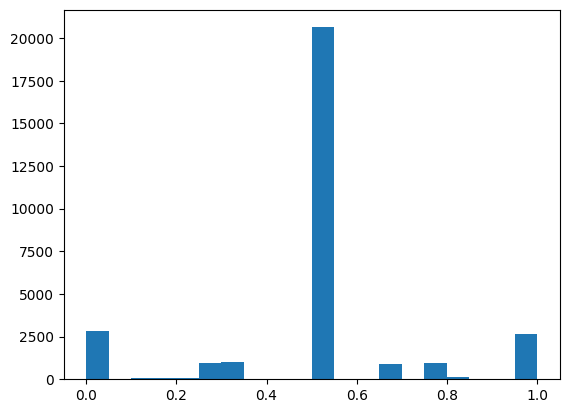

In [25]:
plt.hist(SPY_m_hid_mh['agg_ratio'], bins=20)
plt.show()

(array([2.1038e+04, 6.1730e+03, 1.6080e+03, 2.3400e+02, 2.3500e+02,
        3.5900e+02, 9.6000e+01, 9.2000e+01, 5.8000e+01, 4.2000e+01,
        4.9000e+01, 4.9000e+01, 3.9000e+01, 2.2000e+01, 5.6000e+01,
        8.0000e+00, 6.0000e+00, 9.0000e+00, 6.0000e+00, 4.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 4.0000e+00, 2.0000e+00,
        4.0000e+00, 7.0000e+00, 4.0000e+00, 3.0000e+00, 2.1000e+01]),
 array([1.00000000e+00, 1.67633333e+02, 3.34266667e+02, 5.00900000e+02,
        6.67533333e+02, 8.34166667e+02, 1.00080000e+03, 1.16743333e+03,
        1.33406667e+03, 1.50070000e+03, 1.66733333e+03, 1.83396667e+03,
        2.00060000e+03, 2.16723333e+03, 2.33386667e+03, 2.50050000e+03,
        2.66713333e+03, 2.83376667e+03, 3.00040000e+03, 3.16703333e+03,
        3.33366667e+03, 3.50030000e+03, 3.66693333e+03, 3.83356667e+03,
        4.00020000e+03, 4.16683333e+03, 4.33346667e+03, 4.50010000e+03,
        4.66673333e+03, 4.83336667e+03, 5.00000000e+03]),
 <BarContainer object of 30 

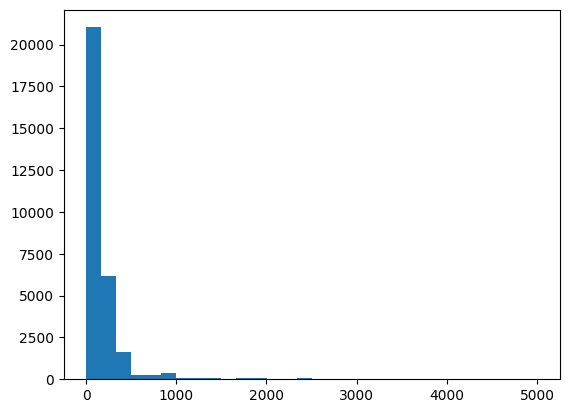

In [26]:
plt.hist(np.sort(SPY_m_hid_mh['size'])[:-20], bins=30)

In [27]:
SPY_m_hid_mh[~SPY_m_hid_mh['hid_at_best']]

,,event_type,order_ID,size,price,direction,event_number_at_t,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_1_prev,ask_size_1_prev,bid_price_1_prev,bid_size_1_prev,midprice,hid_at_best,agg_ratio
datetime,event_number,,,,,,,,,,,,,,,,,
2019-01-02 09:16:16.397038098,1,5,0,1920,2460000,1,2,2460700,1000,2459800,500,2460700.0,1000.0,2459800.0,500.0,2460250.0,False,0.222222
2019-01-02 09:16:17.965022559,1,5,0,1390,2460000,1,2,2460600,500,2459900,500,2460600.0,500.0,2459900.0,500.0,2460250.0,False,0.142857
2019-01-02 09:16:18.043839166,1,5,0,1570,2460000,1,2,2460600,500,2459900,500,2460600.0,500.0,2459900.0,500.0,2460250.0,False,0.142857
2019-01-02 09:16:18.612182747,1,5,0,920,2460000,1,2,2460600,500,2459900,500,2460600.0,500.0,2459900.0,500.0,2460250.0,False,0.142857
2019-01-02 09:16:19.005930542,1,5,0,1000,2460000,1,2,2460600,500,2459900,500,2460600.0,500.0,2459900.0,500.0,2460250.0,False,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-04 15:44:48.813004101,0,5,0,100,2521450,1,6,2521500,200,2521400,800,2521500.0,200.0,2521400.0,800.0,2521450.0,False,0.500000
2019-01-04 15:44:53.414984322,1,5,0,10,2521000,1,2,2521100,900,2520900,300,2521100.0,900.0,2520900.0,300.0,2521000.0,False,0.500000
2019-01-04 15:44:54.018610446,1,5,0,200,2521050,1,2,2521200,600,2521000,900,2521200.0,600.0,2521000.0,900.0,2521100.0,False,0.250000


(array([  163.,  1957., 20634.,  1862.,   155.]),
 array([0.0625    , 0.23571429, 0.40892857, 0.58214286, 0.75535714,
        0.92857143]),
 <BarContainer object of 5 artists>)

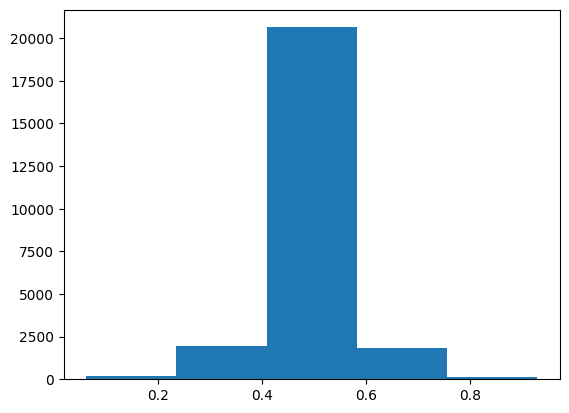

In [28]:
plt.hist(SPY_m_hid_mh[~SPY_m_hid_mh['hid_at_best']]['agg_ratio'], bins=5)

We try to infer the direction of hidden order executions

In [29]:
SPY_m_hid_mh['est_dir'] = SPY_m_hid_mh.apply(
    lambda row: -1 if row['hid_at_best'] == 1 and row['agg_ratio'] > 0 else (1 if row['hid_at_best'] == 1 else 0),
    axis=1
)

Timestamps where there are multiple events where atleast one event is of type 5

In [30]:
mult_event_hid_idx = SPY_m.index.get_level_values('datetime').isin(SPY_m_hid_mh[SPY_m_hid_mh['event_number_at_t'] != 1].index.get_level_values('datetime'))

Timestamp with multi-event where there is a visible buy or sell limit order (event_type 4), we set 5 to the same corresponding direction.

In [31]:
idx_mult_event_buy_vis = SPY_m[mult_event_hid_idx][(SPY_m[mult_event_hid_idx]['event_type'] == 4) & (SPY_m[mult_event_hid_idx]['direction'] == 1)].index
idx_mult_event_sell_vis = SPY_m[mult_event_hid_idx][(SPY_m[mult_event_hid_idx]['event_type'] == 4) & (SPY_m[mult_event_hid_idx]['direction'] == -1)].index

In [32]:
dt_mult_event_buy_vis = idx_mult_event_buy_vis.get_level_values('datetime').unique()
dt_mult_event_sell_vis = idx_mult_event_sell_vis.get_level_values('datetime').unique()

In [33]:
SPY_m_hid_mh.loc[SPY_m_hid_mh.index.get_level_values('datetime').isin(dt_mult_event_buy_vis), 'est_dir'] = 1
SPY_m_hid_mh.loc[SPY_m_hid_mh.index.get_level_values('datetime').isin(dt_mult_event_sell_vis), 'est_dir'] = -1



Timestamp with multi-event where there is an event type 1, we set 5 to the same corresponding direction.

In [34]:
idx_mult_event_buy_lim = SPY_m[mult_event_hid_idx][(SPY_m[mult_event_hid_idx]['event_type'] == 1) & (SPY_m[mult_event_hid_idx]['direction'] == 1)].index
idx_mult_event_sell_lim = SPY_m[mult_event_hid_idx][(SPY_m[mult_event_hid_idx]['event_type'] == 1) & (SPY_m[mult_event_hid_idx]['direction'] == -1)].index

In [35]:
dt_mult_event_buy_lim = idx_mult_event_buy_lim.get_level_values('datetime').unique()
dt_mult_event_sell_lim = idx_mult_event_sell_lim.get_level_values('datetime').unique()

In [37]:
SPY_m_hid_mh.loc[SPY_m_hid_mh.index.get_level_values('datetime').isin(dt_mult_event_buy_lim), 'est_dir'] = 1
SPY_m_hid_mh.loc[SPY_m_hid_mh.index.get_level_values('datetime').isin(dt_mult_event_sell_lim), 'est_dir'] = -1

(array([1.6000e+01, 5.0000e+01, 6.3800e+02, 5.8900e+02, 2.0000e+00,
        1.2966e+04, 6.0000e+00, 4.6400e+02, 6.1100e+02, 5.2000e+01]),
 array([0.07692308, 0.15673077, 0.23653846, 0.31634615, 0.39615385,
        0.47596154, 0.55576923, 0.63557692, 0.71538462, 0.79519231,
        0.875     ]),
 <BarContainer object of 10 artists>)

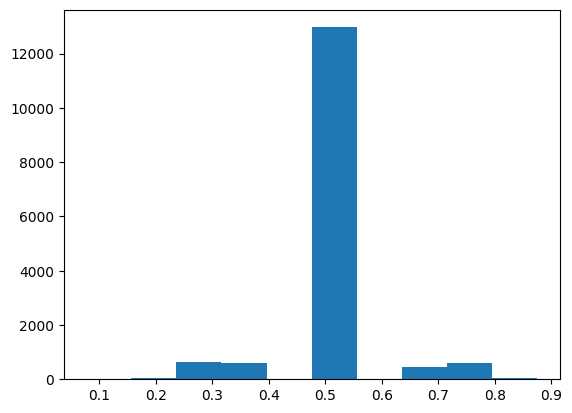

In [41]:
plt.hist(SPY_m_hid_mh[SPY_m_hid_mh['est_dir']==0]['agg_ratio'])